In [21]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        #x=F.sigmoid(self.hidden(x))
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=2, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    #print(loss.data.numpy())

#plt.ioff()
plt.show()





Net(
  (hidden): Linear(in_features=1, out_features=2, bias=True)
  (predict): Linear(in_features=2, out_features=1, bias=True)
)


In [36]:
w = list(net.parameters())
print(w,len(w),"\n")

print(w[0].data.numpy()[0,0])

list(net.parameters())[0].data.numpy()[0,0] += -1.0

w = list(net.parameters())
print(w,len(w),"\n")

print(net.param_groups)

[Parameter containing:
tensor([[-4.4984],
        [ 1.5632]], requires_grad=True), Parameter containing:
tensor([-0.9761, -1.0251], requires_grad=True), Parameter containing:
tensor([[1.7524, 1.6865]], requires_grad=True), Parameter containing:
tensor([0.2430], requires_grad=True)] 4 

-4.49839
[Parameter containing:
tensor([[-5.4984],
        [ 1.5632]], requires_grad=True), Parameter containing:
tensor([-0.9761, -1.0251], requires_grad=True), Parameter containing:
tensor([[1.7524, 1.6865]], requires_grad=True), Parameter containing:
tensor([0.2430], requires_grad=True)] 4 



AttributeError: 'Net' object has no attribute 'param_groups'

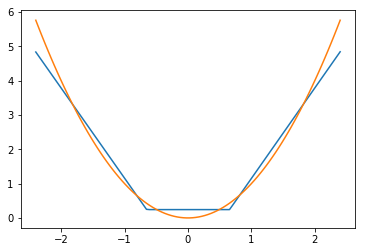

In [23]:
xnew = torch.unsqueeze(torch.linspace(-2.4, 2.4, 100), dim=1) 
ytrue = xnew.pow(2) 

ynew = net(xnew)

plt.plot(xnew.data.numpy(),ynew.data.numpy())
plt.plot(xnew.data.numpy(),ytrue.data.numpy())
plt.show()